In [1]:
import yaml
import torch

from roadvision3d.src.engine.model_builder import build_model
from roadvision3d.src.engine.model_saver import load_checkpoint
from roadvision3d.tools.inference import inference, process_image
from roadvision3d.src.datasets.object_3d import Calibration
from roadvision3d.visualization import Visualizer

from PIL import Image
import numpy as np



%load_ext autoreload
%autoreload 2

In [7]:
config_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/MonoLSS/MonoLSS_DAIR_150e.yaml'
checkpoint_path = '/home/javier/pytorch/RoadVision3D/experiments/MonoLSS_DAIR_150e_MixUp/logs/checkpoints/checkpoint_epoch_150.pth'

cfg = yaml.load(open(config_path, 'r'), Loader=yaml.Loader)    
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = build_model(cfg, device)
load_checkpoint(model = model,
                optimizer = None,
                filename = checkpoint_path,
                map_location=device)


150

In [8]:
data_id = 0

img_path = '/home/javier/datasets/DAIR-V2X/single-infrastructure-side/image/%06d.jpg' % data_id
calib_camera_path = '/home/javier/datasets/DAIR-V2X/single-infrastructure-side/calib/camera_intrinsic/%06d.json' % data_id
calib_lidar_path = '/home/javier/datasets/DAIR-V2X/single-infrastructure-side/calib/virtuallidar_to_camera/%06d.json' % data_id

img_tensor, coord = process_image(img_path, cfg)
calib = Calibration.from_dair_calib_file(calib_camera_path, calib_lidar_path)

In [13]:
results = inference(img_tensor, calib, model, cfg, device, coord)

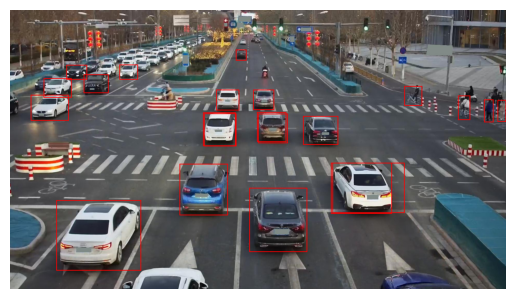

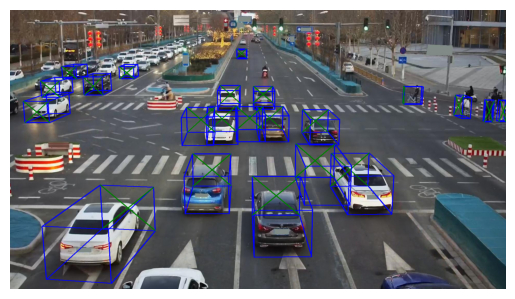

In [14]:
visualizer = Visualizer(calib=calib, pitch=0.22)

img_file = Image.open(img_path)

# Draw 2D bounding boxes on the image
image_with_2d = visualizer.draw_2d_bboxes(img_file, results, color='red', width=3, display=True)

# Draw 3D bounding boxes on the image
image_with_3d = visualizer.draw_3d_bboxes(img_file, results, color='blue', color_front='green', width=4, display=True)